## Mount Drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Converting Wordnet ids to words

In [ ]:

from nltk.corpus import wordnet as wn
import nltk
import json

# Download WordNet (only required once)
nltk.download('wordnet')

# Load your annotations file
with open("/content/drive/MyDrive/DatasetCVPR/annotations.json", "r") as f:
    data = json.load(f)

# Function to convert wordnet_id to name
def wordnet_id_to_name(wordnet_id):
    try:
        offset = int(wordnet_id[1:])
        synset = wn.synset_from_pos_and_offset('n', offset)
        return synset.name().split('.')[0].replace('_', ' ')
    except Exception:
        return "Unknown"

# Add 'name' field to each category
for cat in data['categories']:
    cat['name'] = wordnet_id_to_name(cat['wordnet_id'])

# Save the new file (optional)
with open("annotations_with_names.json", "w") as f:
    json.dump(data, f, indent=2)

cats_name = []
# Preview a few categories
for cat in data['categories']:
    cats_name.append(cat)

display(cats_name[:5])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[{'id': 521, 'wordnet_id': 'n03133878', 'name': 'crock pot'},
 {'id': 526, 'wordnet_id': 'n03179701', 'name': 'desk'},
 {'id': 527, 'wordnet_id': 'n03180011', 'name': 'desktop computer'},
 {'id': 529, 'wordnet_id': 'n03188531', 'name': 'diaper'},
 {'id': 530, 'wordnet_id': 'n03196217', 'name': 'digital clock'}]

In [ ]:


labels = []
for i in range(len(cats_name)):
    labels.append(cats_name[i]['name'])

display(labels[:5])


['crock pot', 'desk', 'desktop computer', 'diaper', 'digital clock']

## ImageNet Classes

In [ ]:

import json
import urllib.request

# Download ImageNet class index
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
imagenet_classes = urllib.request.urlopen(url).read().decode('utf-8').splitlines()

display(imagenet_classes[:5])


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

## Inference Image

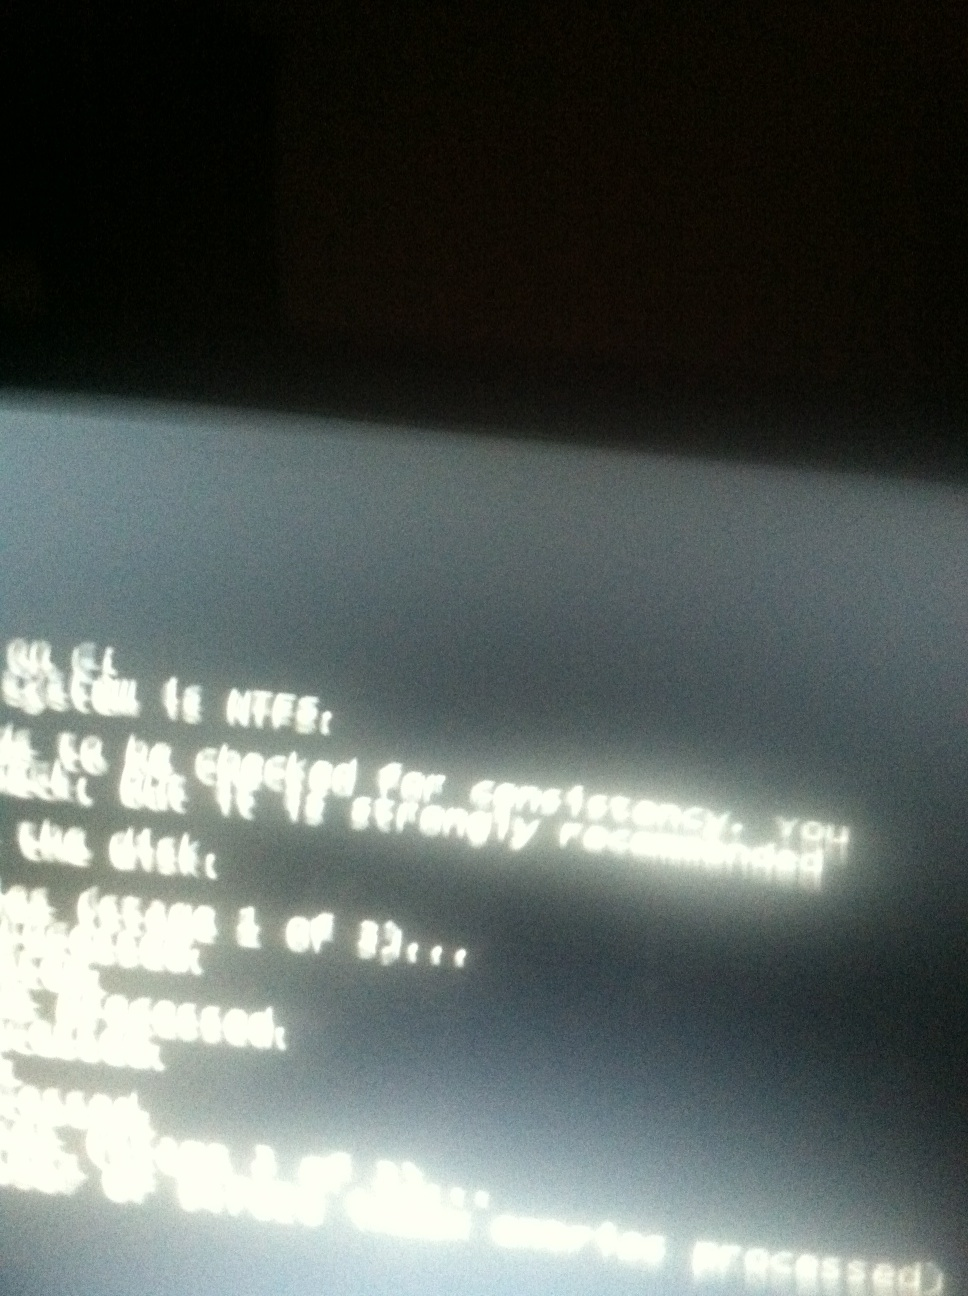

In [ ]:

from IPython.display import Image, display

image_path = "/content/drive/MyDrive/DatasetCVPR/test/VizWiz_test_00007982.jpg"
display(Image(filename=image_path, width=480, height=480))


## AlexNet

In [ ]:

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load pretrained AlexNet
model = models.alexnet(pretrained=True)
model.eval()  # Set to evaluation mode


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 78.0MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:

# Define preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),  # Resize shortest side to 256
    transforms.CenterCrop(224),  # Then crop to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean
                         std=[0.229, 0.224, 0.225])   # ImageNet std
])

# Load and preprocess the image
img = Image.open(image_path).convert('RGB')
input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension


In [ ]:

with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [ ]:

# Print top-5 predictions
top5_alex_net = torch.topk(probabilities, 5)


## VGG11

In [ ]:

import torch
import torchvision.models as models

# Load pretrained VGG11
model = models.vgg11(pretrained=True)
model.eval()  # Set to evaluation mode


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:11<00:00, 46.6MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:

from torchvision import transforms
from PIL import Image

# Define preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),              # Resize shortest side to 256
    transforms.CenterCrop(224),          # Center crop to 224x224
    transforms.ToTensor(),               # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean
                         std=[0.229, 0.224, 0.225])   # ImageNet std
])

# Load and preprocess the image
img = Image.open(image_path).convert('RGB')
input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension


In [ ]:

with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [ ]:

# Print top-5 predictions
top5_vgg_11 = torch.topk(probabilities, 5)


## ViT

In [ ]:

import torch
from torchvision import models

# Load pretrained Vision Transformer (ViT)
model = models.vit_b_16(pretrained=True)  # ViT Base, 16x16 patch size
model.eval()  # Set to evaluation mode


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 95.3MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:

# Define preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),               # Resize shortest side to 256
    transforms.CenterCrop(224),           # Center crop to 224x224
    transforms.ToTensor(),                # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean
                         std=[0.229, 0.224, 0.225])   # ImageNet std
])

# Load and preprocess the image
img = Image.open(image_path).convert('RGB')
input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension


In [ ]:

with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [ ]:

# Print top-5 predictions
top5_vit = torch.topk(probabilities, 5)


## CLIP

In [ ]:

from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Load model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

# Image path (direct from mounted Google Drive)
image = Image.open(image_path).convert("RGB")  # Always convert to RGB for consistency


In [ ]:

inputs = processor(text=imagenet_classes, images=image, return_tensors="pt", padding=True)

# Make predictions using CLIP model
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probabilities = logits_per_image.softmax(dim=1)  # Apply softmax to get probabilities


In [ ]:

# Print top-5 predictions
top5_clip = torch.topk(probabilities, 5)


## Displaying the classification results:

In [ ]:

print("---=== Alex Net ===---\n")
for i in range(5):
    print(f"{imagenet_classes[top5_alex_net.indices[i]]}: {top5_alex_net.values[i].item():.4f}\n")

print("\n---===VGG 11===---\n")
for i in range(5):
    print(f"{imagenet_classes[top5_vgg_11.indices[i]]}: {top5_vgg_11.values[i].item():.4f}\n")

print("\n---===ViT===---\n")
for i in range(5):
    print(f"{imagenet_classes[top5_vit.indices[i]]}: {top5_vit.values[i].item():.4f}\n")

print("\n---===CLIP===---\n")
for i in range(5):
    idx = top5_clip.indices[0, i].item()
    prob = top5_clip.values[0, i].item()
    print(f"{imagenet_classes[idx]}: {prob:.4f}\n")


---=== Alex Net ===---

digital clock: 0.1719

CD player: 0.0706

odometer: 0.0597

notebook: 0.0375

ballpoint: 0.0339


---===VGG 11===---

screen: 0.1651

monitor: 0.1278

digital clock: 0.1245

television: 0.0442

oscilloscope: 0.0435


---===ViT===---

cash machine: 0.5001

screen: 0.3559

television: 0.0387

monitor: 0.0111

laptop: 0.0077


---===CLIP===---

hard disc: 0.5598

monitor: 0.1392

desktop computer: 0.0461

file: 0.0278

television: 0.0210



## CLIP (Voting Based)

In [ ]:

!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-nv7rdl6r
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-nv7rdl6r
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [ ]:

import os
from PIL import Image
import torch
import clip
from tqdm import tqdm
import pickle
from collections import Counter


# Loading the CLIP base variant with 32 batches

In [ ]:

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


## Formatting labels to match CLIP format and Creating test image embedding




In [ ]:

# === STEP 2: Prompt engineering ===
prompts = [f"a photo of a {name}" for name in imagenet_classes]

# === STEP 3: Tokenize and encode ===
with torch.no_grad():
    text_tokens = clip.tokenize(prompts).to(device)
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)  # Normalize to unit length


In [ ]:

k = 11 # Top-k retrieved training images
test_image_path = image_path
train_embedding_path = "/content/drive/MyDrive/DatasetCVPR/clip_train_embeddings.pkl"


In [ ]:

with open(train_embedding_path, "rb") as f:
  train_embeddings_dict = pickle.load(f)

filenames = list(train_embeddings_dict.keys())
train_embeddings = torch.stack([train_embeddings_dict[f] for f in filenames]).to(device)
train_embeddings /= train_embeddings.norm(dim=-1, keepdim=True)


In [ ]:

test_image = preprocess(Image.open(test_image_path).convert("RGB")).unsqueeze(0).to(device)
with torch.no_grad():
  test_feature = model.encode_image(test_image)
  test_feature /= test_feature.norm(dim=-1, keepdim=True)


In [ ]:

similarities = test_feature @ train_embeddings.T
topk_sim, topk_idx = similarities.topk(k, dim=1)


RuntimeError: expected m1 and m2 to have the same dtype, but got: float != c10::Half

In [ ]:

image_dir = "/content/drive/MyDrive/DatasetCVPR/train"
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))]
image_paths = sorted(image_paths)  # optional: keep order stable


In [ ]:

import matplotlib.pyplot as plt

votes = []
for idx in topk_idx[0]:
    img_feat = train_embeddings[idx].unsqueeze(0)  # [1, 512]
    text_sim = img_feat @ text_features.T
    best_text_idx = text_sim.argmax().item()
    votes.append(imagenet_classes[best_text_idx])

    # Display corresponding image
    img_path = image_paths[idx]
    print(img_path)
    image = Image.open(img_path).convert("RGB")

    plt.imshow(image)
    plt.title(f"Voted: {imagenet_classes[best_text_idx]}")
    plt.axis("off")
    plt.show()


In [ ]:

vote_counts = Counter(votes)
predicted_class, count = vote_counts.most_common(1)[0]

print(f"\nTop-{k} Voting Prediction: {predicted_class} ({count} votes)")
print("Full vote breakdown:", dict(vote_counts))


In [ ]:

if predicted_class in labels:
  print("Correct Classification")


In [ ]:
import os
from PIL import Image
import torch
import clip
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

# === CONFIG ===
test_image_dir = "/content/drive/MyDrive/DatasetCVPR/test"
train_embedding_path = "/content/drive/MyDrive/DatasetCVPR/clip_train_embeddings.pkl"
image_dir = "/content/drive/MyDrive/DatasetCVPR/train"  # train image folder for visualization
k = 21
tp = 0

# === Load CLIP ===
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# === Prompt engineering ===
prompts = [f"a photo of a {name}" for name in imagenet_classes]
with torch.no_grad():
    text_tokens = clip.tokenize(prompts).to(device)
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)

# === Load Train Embeddings ===
with open(train_embedding_path, "rb") as f:
    train_embeddings_dict = pickle.load(f)

filenames = list(train_embeddings_dict.keys())
train_embeddings = torch.stack([train_embeddings_dict[f] for f in filenames]).to(device)
train_embeddings /= train_embeddings.norm(dim=-1, keepdim=True)

# === Prepare train image paths ===
image_paths = sorted([
    os.path.join(image_dir, f)
    for f in os.listdir(image_dir)
    if f.lower().endswith(('.jpg', '.png'))
])

# === Loop over all test images ===
test_image_files = sorted([
    f for f in os.listdir(test_image_dir)
    if f.lower().endswith(('.jpg', '.png'))
])

for test_filename in tqdm(test_image_files, desc="Processing test images"):
    test_path = os.path.join(test_image_dir, test_filename)

    test_image = preprocess(Image.open(test_path).convert("RGB")).unsqueeze(0).to(device)
    with torch.no_grad():
        test_feature = model.encode_image(test_image)
        test_feature /= test_feature.norm(dim=-1, keepdim=True)

    # Compute similarity
    similarities = test_feature @ train_embeddings.T
    topk_sim, topk_idx = similarities.topk(k, dim=1)

    # Voting
    votes = []
    for idx in topk_idx[0]:
        img_feat = train_embeddings[idx].unsqueeze(0)
        text_sim = img_feat @ text_features.T
        best_text_idx = text_sim.argmax().item()
        votes.append(imagenet_classes[best_text_idx])

    vote_counts = Counter(votes)
    predicted_class, count = vote_counts.most_common(1)[0]

    print(f"\n🖼 Image: {test_filename}")
    print(f"Top-{k} Voting Prediction: {predicted_class} ({count} votes)")
    print("Full vote breakdown:", dict(vote_counts))

    if predicted_class in labels:
        print("✅ Prediction is in label list")
        tp += 1
    else:
        print("❌ Prediction NOT in label list")


In [ ]:
tp/8000